In [1]:
%cd ..
from inpainting.models import BERT
from inpainting.trainer import Trainer
from inpainting.datasets import MNIST

/home/ventus/image-inpainting


In [2]:
mnist = MNIST(frac=0.01, clusters=299)

In [3]:
model = BERT(
    vocab_size = mnist.tokens,      # BERT's vocabulary size
    embed_size = mnist.tokens,      # Hidden size
    num_layers = 12,                # Number of Transformer layers
    num_heads = 12,                  # Numbertargets of attention heads
    ff_hidden = 6400,               # Feed-forward hidden size
    max_len = 7*7,                  # Maximum sequence length
    dropout = 0.00
)

The training data generator chooses 15% of the token positions at random for prediction. If the i-th token is chosen, we replace the i-th token with (1) the [MASK] token 80% of the time (2) a random token 10% of the time (3) the unchanged i-th token 10% of the time.

In [4]:
Trainer(model, mnist).train(epochs=50, batch_size=64, lr=2e-5)

running on device cuda
Epoch: 0.00	RMSE: 80.89	Loss: 2.50e+00	Learning Rate: 1.96e-05
Epoch: 1.00	RMSE: 77.46	Loss: 2.07e+00	Learning Rate: 1.91e-05
Epoch: 2.00	RMSE: 82.34	Loss: 2.12e+00	Learning Rate: 1.87e-05
Epoch: 3.00	RMSE: 76.95	Loss: 1.80e+00	Learning Rate: 1.83e-05
Epoch: 4.00	RMSE: 78.38	Loss: 1.74e+00	Learning Rate: 1.79e-05
Epoch: 5.00	RMSE: 76.90	Loss: 1.65e+00	Learning Rate: 1.74e-05
Epoch: 6.00	RMSE: 73.97	Loss: 1.51e+00	Learning Rate: 1.70e-05
Epoch: 7.00	RMSE: 71.65	Loss: 1.40e+00	Learning Rate: 1.66e-05
Epoch: 8.00	RMSE: 63.47	Loss: 1.24e+00	Learning Rate: 1.62e-05
Epoch: 9.00	RMSE: 59.38	Loss: 1.11e+00	Learning Rate: 1.57e-05
Epoch: 10.00	RMSE: 52.20	Loss: 9.60e-01	Learning Rate: 1.53e-05
Epoch: 11.00	RMSE: 46.76	Loss: 8.63e-01	Learning Rate: 1.49e-05
Epoch: 12.00	RMSE: 42.17	Loss: 8.06e-01	Learning Rate: 1.44e-05
Epoch: 13.00	RMSE: 40.93	Loss: 7.26e-01	Learning Rate: 1.40e-05
Epoch: 14.00	RMSE: 36.66	Loss: 6.84e-01	Learning Rate: 1.36e-05
Epoch: 15.00	RMSE: 37.63	Lo

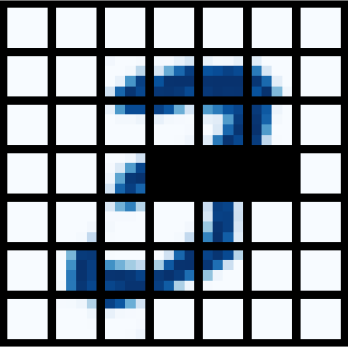

In [41]:
x = mnist[7]["input_ids"]
mnist.plot_sample(x)

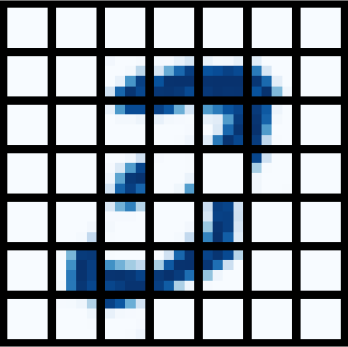

In [42]:
y = model(x.unsqueeze(0).cuda()).logits.argmax(dim=-1).cpu()
mnist.plot_sample(y)